# Instructions

Load the dataset and explore the variables

We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.
Extract the target variable

Extract the independent variables and scale them

Build the logistic regression model

Evaluate the model

Even a simple model will give us more than 70% accuracy. Why?

Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix


## Getting data

In [2]:
data = pd.read_csv('files_for_lab/customer_churn.csv')

In [3]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Checking content of independent variables

In [6]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [7]:
data['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
9     119
12    117
10    116
6     110
13    109
68    100
11     99
15     99
67     98
18     97
69     95
24     94
22     90
66     89
35     88
17     87
23     85
56     80
52     80
64     80
16     80
26     79
25     79
60     76
61     76
65     76
14     76
46     74
19     73
27     72
29     72
30     72
63     72
20     71
62     70
41     70
53     70
32     69
50     68
54     68
51     68
47     68
58     67
49     66
31     65
43     65
42     65
34     65
57     65
37     65
40     64
48     64
55     64
33     64
21     63
45     61
59     60
38     59
28     57
39     56
44     51
36     50
0      11
Name: tenure, dtype: int64

In [8]:
data['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.90     44
19.95     44
19.65     43
          ..
87.65      1
35.30      1
114.85     1
56.50      1
97.25      1
Name: MonthlyCharges, Length: 1585, dtype: int64

# Splitting my data into dependant (y) and independent (X) variables.


In [9]:
y = pd.DataFrame(data=data, columns=['Churn'])

In [10]:
X = pd.DataFrame(data = data,columns = ['SeniorCitizen','tenure','MonthlyCharges'])

In [11]:
X

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [12]:
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [13]:
## data['Churn'] = data['Churn'] == 'Yes'

<AxesSubplot:xlabel='Churn', ylabel='count'>

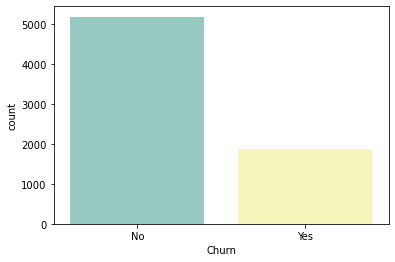

In [14]:
sns.countplot(x=data['Churn'],data = data,palette = 'Set3')  ## we can see our data is imbalanced

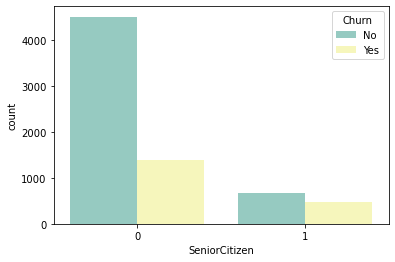

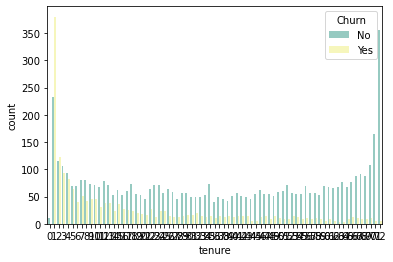

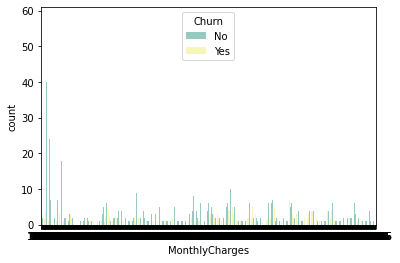

In [15]:
for feature in X:
    sns.countplot(x=feature,data = data,palette = 'Set3',hue = data['Churn'])
    plt.show()
    

### Checking multicollinearity between independent variables

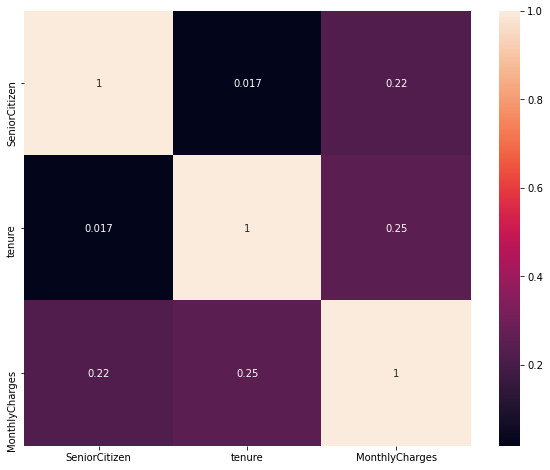

In [16]:
cm=data.corr(method='pearson') 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm, annot=True)
plt.show()

### There is no high collinearity between independent variables

### Scaling independant variables


In [17]:
scaler = StandardScaler()
# fit scaler on data
scaler.fit(X)
# apply transform
X_scaled = scaler.transform(X)
X_scaled= pd.DataFrame(X_scaled) 

### Splitting the model into Test and Train with a test size of 20%


In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 0)

### Checking the accuracy of my model


In [19]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_predict = classification.predict(X_test)
print("The accuracy of the logistic_regression model is: %4.2f "% (classification.score(X_test, y_test)))

The accuracy of the logistic_regression model is: 0.78 


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.61      0.46      0.52       368
          No       0.82      0.90      0.86      1041

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



Confusion matrix on train set:


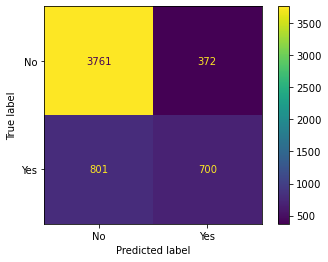

Confusion matrix on test set:


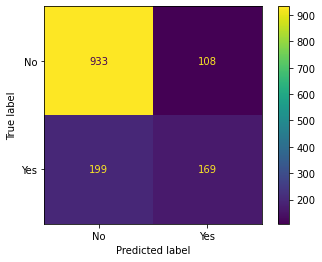

In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

print('Confusion matrix on train set:')
plot_confusion_matrix(classification, X_train, y_train)
plt.show() 
print('Confusion matrix on test set:')
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

#### From the confusion matrix we see that model is quite good at predicting "No" labels,but quite bad at predicting  "Yes" labels

## Synthetic Minority Oversampling Technique (SMOTE)


In [22]:
sm = SMOTE(random_state = 10)
X_sm,y_sm = sm.fit_resample(X,y)
y_sm.value_counts()

Churn
No       5174
Yes      5174
dtype: int64

In [23]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_sm, y_sm, test_size=0.2, 
                                                                                   random_state=10)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_smote, y_train_smote)
y_predict_smote = classification.predict(X_test_smote)
print("The accuracy of the logistic_regression model after undersampling is: %4.2f "% (classification.score(X_test_smote, y_test_smote)))

The accuracy of the logistic_regression model after undersampling is: 0.72 


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_smote, y_predict_smote, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.71      0.73      0.72      1013
          No       0.73      0.71      0.72      1057

    accuracy                           0.72      2070
   macro avg       0.72      0.72      0.72      2070
weighted avg       0.72      0.72      0.72      2070



## Random Undersampler

In [25]:
rus = RandomUnderSampler(random_state = 10)
X_rus, Y_rus = rus.fit_resample(X_scaled, y)
Y_rus.value_counts()

Churn
No       1869
Yes      1869
dtype: int64

In [26]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, Y_rus, test_size = 0.2, random_state = 10)
classification = LogisticRegression(random_state = 0, solver = 'lbfgs',
                  multi_class = 'ovr').fit(X_train, y_train)

y_train_predict = classification.predict(X_train_rus)
y_test_predict = classification.predict(X_test_rus)
print("The accuracy of the logistic_regression model after RandomUnderSampling is: %4.2f "% (classification.score(X_test_rus, y_test_rus)))

The accuracy of the logistic_regression model after RandomUnderSampling is: 0.70 


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_rus, y_test_predict, labels=['Yes','No']))

              precision    recall  f1-score   support

         Yes       0.79      0.48      0.59       349
          No       0.66      0.89      0.76       399

    accuracy                           0.70       748
   macro avg       0.73      0.68      0.68       748
weighted avg       0.72      0.70      0.68       748



## Random Oversampler

In [ ]:
ros = RandomOverSampler(random_state = 10)
X_ros, Y_ros = ros.fit_resample(X_scaled, y)
Y_ros.value_counts()

In [ ]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, Y_ros, test_size = 0.2, random_state = 10)
classification = LogisticRegression(random_state = 0, solver = 'lbfgs',
                  multi_class = 'ovr').fit(X_train, y_train)
y_train_ros_predict = classification.predict(X_train)
y_test_ros_predict = classification.predict(X_test_ros)
print("The accuracy of the logistic_regression model after Random Oversampling is: %4.2f "% (classification.score(X_test_ros, y_test_ros)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_ros, y_test_ros_predict, labels=['Yes','No']))

In [393]:
print("The accuracy of the logistic_regression model after oversampling is: %4.2f "% (classification.score(X_test_ros, y_test_ros)))

The accuracy of the logistic_regression model after oversampling is: 0.40 


## Tomek links

In [ ]:
from imblearn.under_sampling import TomekLinks
t1 = TomekLinks('majority')
X_t1, y_t1 = t1.fit_resample(X_scaled, y)
y_t1.value_counts()

In [ ]:
X_train_tom, X_test_tom, y_train_tom, y_test_tom = train_test_split(X_t1, y_tl, test_size=0.2, random_state=100)

In [ ]:
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train_tom, y_train_tom)
y_predict_tom = classification.predict(X_test_tom)
print("The accuracy of the logistic_regression model after undersampling is: %4.2f "% (classification.score(X_test_tom, y_test_tom)))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_tom, y_predict_tom, labels=['Yes','No']))